# Data analysis DBR

We analyze the following DBR samples from the edx course



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import ubcpdk
from ubcpdk.data.dbr import dbrs

2022-06-22 20:39:05.778 | INFO     | gdsfactory.config:<module>:52 - Load '/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/gdsfactory' 5.10.15


2022-06-22 20:39:07.639 | INFO     | ubcpdk:<module>:36 - Found UBCpdk '1.6.4' installed at PosixPath('/home/runner/work/ubc/ubc/ubcpdk')


(1530.0, 1600.0)

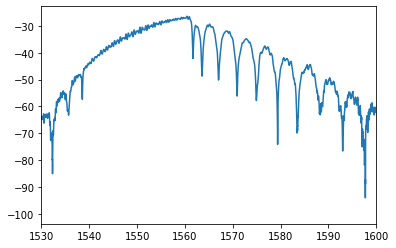

In [2]:
w, p = ubcpdk.data.read_mat(dbrs["1_10"], 1)
plt.plot(w * 1e9, p)
plt.xlim([1530, 1600])

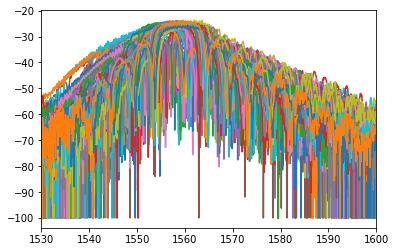

In [3]:
for key in dbrs.keys():
    w, p = ubcpdk.data.read_mat(dbrs[key], 1)
    # plt.figure()
    # plt.title(key)
    plt.plot(w * 1e9, p, label=key)
    plt.xlim([1530, 1600])

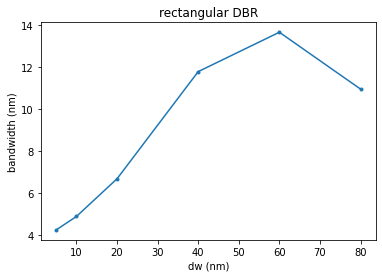

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from ubcpdk import data
from ubcpdk.data.dbr import dbrs

r1_names = [f"1_{i}" for i in list(range(1, 12, 2))]
r1_dw = [5, 10, 20, 40, 60, 80]
s1_names = [f"1_{i}" for i in list(range(2, 12, 2))]
s1_dw = [200, 180, 160, 140, 120]

r2_names = [f"2_{i}" for i in list(range(13, 24, 2))]
r2_dw = [100, 120, 140, 160, 180, 200]
s2_names = [f"2_{i}" for i in list(range(12, 25, 2))]
s2_dw = [100, 80, 60, 40, 20, 10, 5]

r4_names = [f"4_{i}" for i in list(range(1, 25, 2))]
r4_dw = list(range(20, 32))
s4_names = [f"4_{i}" for i in list(range(2, 25, 2))]
s4_dw = list(range(31, 19, -1))


def find_banwidths(names, dw, title=None):
    bw = np.zeros_like(names, dtype=float)
    for i, key in enumerate(names):
        w, p = data.read_mat(dbrs[key], port=1)
        wc, pc = data.chop(w, p, ymin=-60)
        pw = data.windowed_mean(pc)
        bw[i] = data.find_bandwidth(wc, pw)

    plt.plot(dw, bw * 1e9, ".-")
    plt.xlabel("dw (nm)")
    plt.ylabel("bandwidth (nm)")
    if title:
        plt.title(title)


bw = find_banwidths(r1_names, r1_dw, title="rectangular DBR")

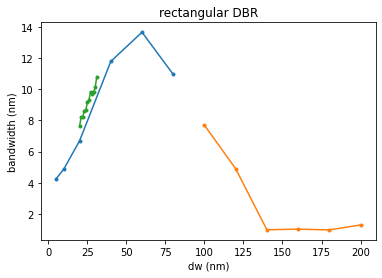

In [5]:
bw = find_banwidths(r1_names, r1_dw, title="rectangular DBR")
bw = find_banwidths(r2_names, r2_dw, title="rectangular DBR")
bw = find_banwidths(r4_names, r4_dw, title="rectangular DBR")

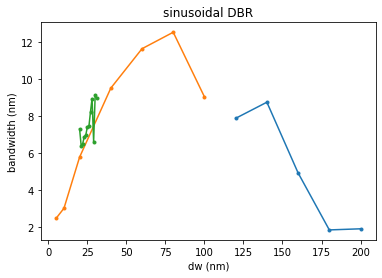

In [6]:
bw = find_banwidths(s1_names, s1_dw, title="sinusoidal DBR")
bw = find_banwidths(s2_names, s2_dw, title="sinusoidal DBR")
bw = find_banwidths(s4_names, s4_dw, title="sinusoidal DBR")